<a href="https://colab.research.google.com/github/fralfaro/r4ds-book/blob/main/docs/12_tidy_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tidy data


## Introduction

> "Happy families are all alike; every unhappy family is unhappy in its own way."\
> --- Leo Tolstoy

> "Tidy datasets are all alike, but every messy dataset is messy in its own way."\
> --- Hadley Wickham

In this chapter, you will learn a consistent way to organize your data in R using a system called **tidy data**.
Getting your data into this format requires some work up front, but that work pays off in the long term.
Once you have tidy data and the tidy tools provided by packages in the tidyverse, you will spend much less time munging data from one representation to another, allowing you to spend more time on the data questions you care about.

In this chapter, you'll first learn the definition of tidy data and see it applied to simple toy dataset.
Then we'll dive into the main tool you'll use for tidying data: pivoting.
Pivoting allows you to change the form of your data, without changing any of the values.
We'll finish up with a discussion of usefully untidy data, and how you can create it if needed.
If you particularly enjoy this chapter and want to learn more about the underlying theory, you can learn more about the history and theoretical underpinnings in the [Tidy Data](https://www.jstatsoft.org/article/view/v059i10) paper published in the Journal of Statistical Software.

### Prerequisites

In this chapter we'll focus on tidyr, a package that provides a bunch of tools to help tidy up your messy datasets.
tidyr is a member of the core tidyverse.



In [1]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()





From this chapter on, we'll suppress the loading message from `library(tidyverse)`.

## Tidy data 

You can represent the same underlying data in multiple ways.
The example below shows the same data organised in four different ways.
Each dataset shows the same values of four variables: *country*, *year*, *population*, and *cases* of TB (tuberculosis), but each dataset organizes the values in a different way.

<!-- TODO redraw as tables -->



In [4]:
table1

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [5]:
table2

country,year,type,count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [6]:
table3

,country,year,rate
,<chr>,<int>,<chr>
1,Afghanistan,1999,745/19987071
2,Afghanistan,2000,2666/20595360
3,Brazil,1999,37737/172006362
4,Brazil,2000,80488/174504898
5,China,1999,212258/1272915272
6,China,2000,213766/1280428583


In [7]:
# Spread across two tibbles
table4a # cases

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,745,2666
2,Brazil,37737,80488
3,China,212258,213766


In [8]:
table4b # population

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,19987071,20595360
2,Brazil,172006362,174504898
3,China,1272915272,1280428583



These are all representations of the same underlying data, but they are not equally easy to use.
One of them, `table1`, will be much easier to work with inside the tidyverse because it's tidy.

There are three interrelated rules that make a dataset tidy:

1.  Each variable is a column; each column is a variable.
2.  Each observation is row; each row is an observation.
3.  Each value is a cell; each cell is a single value.


<center>
    <img src="https://d33wubrfki0l68.cloudfront.net/6f1ddb544fc5c69a2478e444ab8112fb0eea23f8/91adc/images/tidy-1.png" alt="img R"  >
Following three rules makes a dataset tidy: variables are in columns, observations are in rows, and values are in cells.
</center>

Why ensure that your data is tidy?
There are two main advantages:

1.  There's a general advantage to picking one consistent way of storing data.
    If you have a consistent data structure, it's easier to learn the tools that work with it because they have an underlying uniformity.

2.  There's a specific advantage to placing variables in columns because it allows R's vectorised nature to shine.
    As you learned in Sections \@ref(mutate) and \@ref(summarize), most built-in R functions work with vectors of values.
    That makes transforming tidy data feel particularly natural.

dplyr, ggplot2, and all the other packages in the tidyverse are designed to work with tidy data.
Here are a couple of small examples showing how you might work with `table1`.



country,year,cases,population,rate
<chr>,<int>,<int>,<int>,<dbl>
Afghanistan,1999,745,19987071,0.372741
Afghanistan,2000,2666,20595360,1.294466
Brazil,1999,37737,172006362,2.193930
Brazil,2000,80488,174504898,4.612363
China,1999,212258,1272915272,1.667495
China,2000,213766,1280428583,1.669488


year,n
<int>,<int>
1999,250740
2000,296920


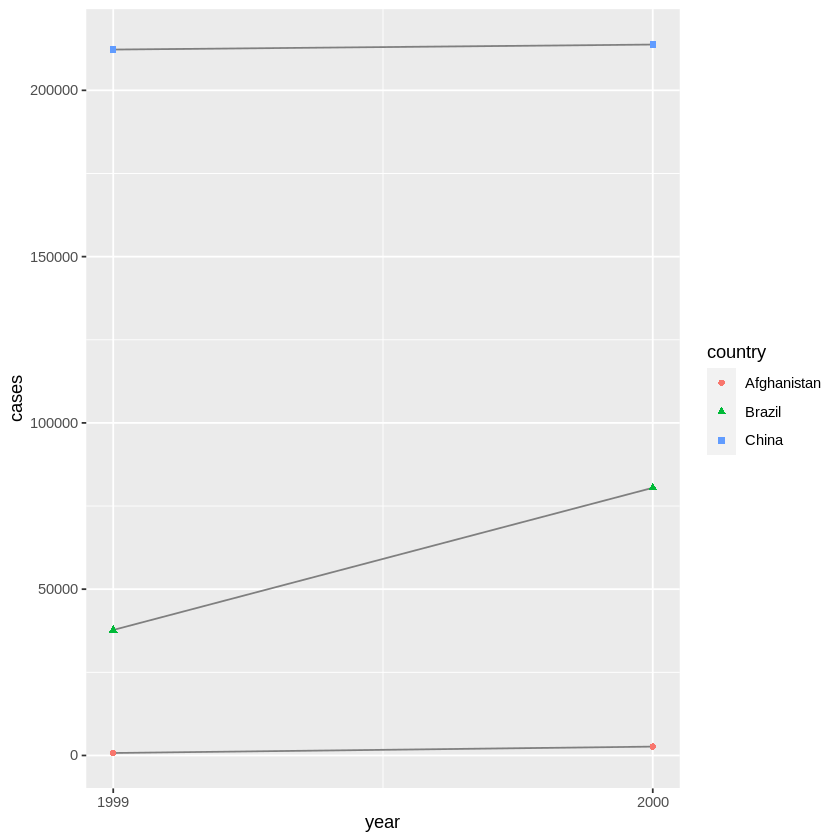

In [9]:
# Compute rate per 10,000
table1 |>
  mutate(
    rate = cases / population * 10000
  )

# Compute cases per year
table1 |>
  count(year, wt = cases)

# Visualise changes over time
ggplot(table1, aes(year, cases)) +
  geom_line(aes(group = country), color = "grey50") +
  geom_point(aes(color = country, shape = country)) +
  scale_x_continuous(breaks = c(1999, 2000))



### Exercises

1.  Using prose, describe how the variables and observations are organised in each of the sample tables.

2.  Sketch out the process you'd use to calculate the `rate` for `table2` and `table4a` + `table4b`.
    You will need to perform four operations:

    a.  Extract the number of TB cases per country per year.
    b.  Extract the matching population per country per year.
    c.  Divide cases by population, and multiply by 10000.
    d.  Store back in the appropriate place.

    You haven't yet learned all the functions you'd need to actually perform these operations, but you should still be able to think through the transformations you'd need.

3.  Recreate the plot showing change in cases over time using `table2` instead of `table1`.
    What do you need to do first?




## Pivoting

The principles of tidy data might seem so obvious that you wonder if you'll ever encounter a dataset that isn't tidy.
Unfortunately, however, most real data is untidy.
There are two main reasons:

1.  Data is often organised to facilitate some goal other than analysis.
    For example, it's common for data to be structured to make data entry, not analysis, easy.

2.  Most people aren't familiar with the principles of tidy data, and it's hard to derive them yourself unless you spend a lot of time working with data.

This means that most real analyses will require at least a little tidying.
You'll begin by figuring out what the underlying variables and observations are.
Sometimes this is easy; other times you'll need to consult with the people who originally generated the data.
Next, you'll **pivot** your data into a tidy form, with variables in the columns and observations in the rows.

tidyr provides two functions for pivoting data: `pivot_longer()`, which makes datasets **longer** by increasing rows and reducing columns, and `pivot_wider()` which makes datasets **wider** by increasing columns and reducing rows.
The following sections work through the use of `pivot_longer()` and `pivot_wider()` to tackle a wide range of realistic datasets.
These examples are drawn from `vignette("pivot", package = "tidyr")`, which you should check out if you want to see more variations and more challenging problems.

Let's dive in.

### Data in column names 

The `billboard` dataset records the billboard rank of songs in the year 2000:



In [10]:
billboard

artist,track,date.entered,wk1,wk2,wk3,wk4,wk5,wk6,wk7,⋯,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
2 Pac,Baby Don't Cry (Keep...,2000-02-26,87,82,72,77,87,94,99,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2Ge+her,The Hardest Part Of ...,2000-09-02,91,87,92,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3 Doors Down,Kryptonite,2000-04-08,81,70,68,67,66,57,54,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3 Doors Down,Loser,2000-10-21,76,76,72,69,67,65,55,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
504 Boyz,Wobble Wobble,2000-04-15,57,34,25,17,17,31,36,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
98^0,Give Me Just One Nig...,2000-08-19,51,39,34,26,26,19,2,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
A*Teens,Dancing Queen,2000-07-08,97,97,96,95,100,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Aaliyah,I Don't Wanna,2000-01-29,84,62,51,41,38,35,35,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Aaliyah,Try Again,2000-03-18,59,53,38,28,21,18,16,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA




In this dataset, each observation is a song.
The first three columns (`artist`, `track` and `date.entered`) are variables that describe the song.
Then we have 76 columns (`wk1`-`wk76`) that describe the rank of the song in each week.
Here, the column names are one variable (the `week`) and the cell values are another (the `rank`).

To tidy this data, we'll use `pivot_longer()`.
After the data, there are three key arguments:

-   `cols` specifies which columns need to be pivoted, i.e. which columns aren't variables. This argument uses the same syntax as `select()` so here we could use `!c(artist, track, date.entered)` or `starts_with("wk")`.
-   `names_to` names of the variable stored in the column names, here `"week"`.
-   `values_to` names the variable stored in the cell values, here `"rank"`.

That gives the following call:



```{r, R.options=list(pillar.print_min = 10)}
billboard |> 
  pivot_longer(
    cols = starts_with("wk"), 
    names_to = "week", 
    values_to = "rank"
  )
```



What happens if a song is in the top 100 for less than 76 weeks?
Take 2 Pac's "Baby Don't Cry", for example.
The above output suggests that it was only the top 100 for 7 weeks, and all the remaining weeks are filled in with missing values.
These `NA`s don't really represent unknown observations; they're forced to exist by the structure of the dataset[^data-tidy-1], so we can ask `pivot_longer` to get rid of them by setting `values_drop_na = TRUE`:

[^data-tidy-1]: We'll come back to this idea in [Chapter -@sec-missing-values].



In [11]:
billboard |> 
  pivot_longer(
    cols = starts_with("wk"), 
    names_to = "week", 
    values_to = "rank",
    values_drop_na = TRUE
  )

artist,track,date.entered,week,rank
<chr>,<chr>,<date>,<chr>,<dbl>
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk1,87
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk2,82
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk3,72
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk4,77
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk5,87
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk6,94
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk7,99
2Ge+her,The Hardest Part Of ...,2000-09-02,wk1,91
2Ge+her,The Hardest Part Of ...,2000-09-02,wk2,87



You might also wonder what happens if a song is in the top 100 for more than 76 weeks?
We can't tell from this data, but you might guess that additional columns `wk77`, `wk78`, ... would be added to the dataset.

This data is now tidy, but we could make future computation a bit easier by converting `week` into a number using `mutate()` and `parse_number()`.
You'll learn more about `parse_number()` and friends in [Chapter -@sec-data-import].



In [12]:
billboard |> 
  pivot_longer(
    cols = starts_with("wk"), 
    names_to = "week", 
    values_to = "rank",
    values_drop_na = TRUE
  )

artist,track,date.entered,week,rank
<chr>,<chr>,<date>,<chr>,<dbl>
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk1,87
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk2,82
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk3,72
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk4,77
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk5,87
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk6,94
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk7,99
2Ge+her,The Hardest Part Of ...,2000-09-02,wk1,91
2Ge+her,The Hardest Part Of ...,2000-09-02,wk2,87


You might also wonder what happens if a song is in the top 100 for more than 76 weeks?
We can't tell from this data, but you might guess that additional columns `wk77`, `wk78`, ... would be added to the dataset.

This data is now tidy, but we could make future computation a bit easier by converting `week` into a number using `mutate()` and `parse_number()`.
You'll learn more about `parse_number()` and friends in [Chapter -@sec-data-import].


In [14]:
billboard_tidy <- billboard |> 
  pivot_longer(
    cols = starts_with("wk"), 
    names_to = "week", 
    values_to = "rank",
    values_drop_na = TRUE
  ) |> 
  mutate(
    week = parse_number(week)
  )
billboard_tidy

artist,track,date.entered,week,rank
<chr>,<chr>,<date>,<dbl>,<dbl>
2 Pac,Baby Don't Cry (Keep...,2000-02-26,1,87
2 Pac,Baby Don't Cry (Keep...,2000-02-26,2,82
2 Pac,Baby Don't Cry (Keep...,2000-02-26,3,72
2 Pac,Baby Don't Cry (Keep...,2000-02-26,4,77
2 Pac,Baby Don't Cry (Keep...,2000-02-26,5,87
2 Pac,Baby Don't Cry (Keep...,2000-02-26,6,94
2 Pac,Baby Don't Cry (Keep...,2000-02-26,7,99
2Ge+her,The Hardest Part Of ...,2000-09-02,1,91
2Ge+her,The Hardest Part Of ...,2000-09-02,2,87




Now we're in a good position to look at how song ranks vary over time by drawing a plot.
The code is shown below and the result is @fig-billboard-ranks.


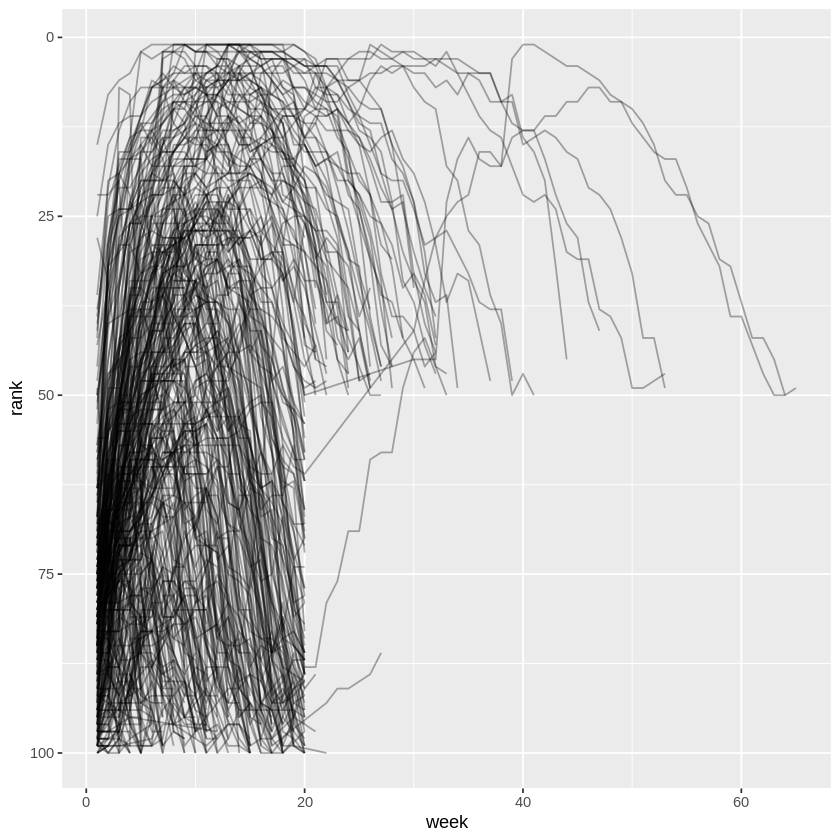

In [15]:
billboard_tidy |> 
  ggplot(aes(week, rank, group = track)) + 
  geom_line(alpha = 1/3) + 
  scale_y_reverse()


### How does pivoting work?

Now that you've seen what pivoting can do for you, it's worth taking a little time to gain some intuition about what it does to the data.
Let's start with a very simple dataset to make it easier to see what's happening:
*italicized text*

In [18]:
df <- tribble(
  ~var, ~col1, ~col2,
   "A",     1,     2,
   "B",     3,     4,
   "C",     5,     6
)


Here we'll say there are three variables: `var` (already in a variable), `name` (the column names in the column names), and `value` (the cell values).
So we can tidy it with:


In [19]:
df |> 
  pivot_longer(
    cols = col1:col2,
    names_to = "names",
    values_to = "values"
  )

var,names,values
<chr>,<chr>,<dbl>
A,col1,1
A,col2,2
B,col1,3
B,col2,4
C,col1,5
C,col2,6



How does this transformation take place?
It's easier to see if we take it component by component.
Columns that are already variables need to be repeated, once for each column in `cols`, as shown in @fig-pivot-variables.



```{r}
#| label: fig-pivot-variables
#| echo: false
#| fig-cap: > 
#|   Columns that are already variables need to be repeated, once for
#|   each column that is pivotted.
#| fig-alt: > 
#|   A diagram showing how `pivot_longer()` transforms a simple
#|   dataset, using color to highlight how the values in the `var` column
#|   ("A", "B", "C") are each repeated twice in the output because there are
#|   two columns being pivotted ("col1" and "col2").

knitr::include_graphics("diagrams/tidy-data/variables.png", dpi = 270)
```



The column names become values in a new variable, whose name is given by `names_to`, as shown in @fig-pivot-names.
They need to be repeated once for each row in the original dataset.



```{r}
#| label: fig-pivot-names
#| echo: false
#| fig-cap: >
#|   The column names of pivoted columns become a new column.
#| fig-alt: > 
#|   A diagram showing how `pivot_longer()` transforms a simple
#|   data set, using color to highlight how column names ("col1" and 
#|   "col2") become the values in a new `var` column. They are repeated
#|   three times because there were three rows in the input.

knitr::include_graphics("diagrams/tidy-data/column-names.png", dpi = 270)
```



The cell values also become values in a new variable, with a name given by `values_to`.
They are unwound row by row.
@fig-pivot-values illustrates the process.




```{r}
#| label: fig-pivot-values
#| echo: false
#| fig-cap: >
#|   The number of values is preserved (not repeated), but unwound
#|   row-by-row.
#| fig-alt: > 
#|   A diagram showing how `pivot_longer()` transforms data,
#|   using color to highlight how the cell values (the numbers 1 to 6)
#|   become the values in a new `value` column. They are unwound row-by-row,
#|   so the original rows (1,2), then (3,4), then (5,6), become a column
#|   running from 1 to 6.

knitr::include_graphics("diagrams/tidy-data/cell-values.png", dpi = 270)
```



### Many variables in column names

A more challenging situation occurs when you have multiple variables crammed into the column names.
For example, take the `who2` dataset:




```{r}
who2
```



This dataset records information about tuberculosis data collected by the WHO.
There are two columns that are already variables and are easy to interpret: `country` and `year`.
They are followed by 56 columns like `sp_m_014`, `ep_m_4554`, and `rel_m_3544`.
If you stare at these columns for long enough, you'll notice there's a pattern.
Each column name is made up of three pieces separated by `_`.
The first piece, `sp`/`rel`/`ep`, describes the method used for the `diagnosis`, the second piece, `m`/`f` is the `gender`, and the third piece, `014`/`1524`/`2535`/`3544`/`4554`/`65` is the `age` range.

So in this case we have six variables: two variables are already columns, three variables are contained in the column name, and one variable is in the cell name.
This requires two changes to our call to `pivot_longer()`: `names_to` gets a vector of column names and `names_sep` describes how to split the variable name up into pieces:



```{r}
who2 |> 
  pivot_longer(
    cols = !(country:year),
    names_to = c("diagnosis", "gender", "age"), 
    names_sep = "_",
    values_to = "count"
  )
```



An alternative to `names_sep` is `names_pattern`, which you can use to extract variables from more complicated naming scenarios, once you've learned about regular expressions in [Chapter -@sec-regular-expressions].

Conceptually, this is only a minor variation on the simpler case you've already seen.
@fig-pivot-multiple-names shows the basic idea: now, instead of the column names pivoting into a single column, they pivot into multiple columns.
You can imagine this happening in two steps (first pivoting and then separating) but under the hood it happens in a single step because that gives better performance.



```{r}
#| label: fig-pivot-multiple-names
#| echo: false
#| fig-cap: >
#|   Pivotting with many variables in the column names means that each
#|   column name now fills in values in multiple output columns.
#| fig-alt: >
#|   A diagram that uses color to illustrate how supplying `names_sep` 
#|   and multiple `names_to` creates multiple variables in the output.
#|   The input has variable names "x_1" and "y_2" which are split up
#|   by "_" to create name and number columns in the output. This is
#|   is similar case with a single `names_to`, but what would have been a
#|   single output variable is now separated into multiple variables.

knitr::include_graphics("diagrams/tidy-data/multiple-names.png", dpi = 270)
```



### Data and variable names in the column headers

The next step up in complexity is when the column names include a mix of variable values and variable names.
For example, take the `household` dataset:




```{r}
household
```



This dataset contains data about five families, with the names and dates of birth of up to two children.
The new challenge in this dataset is that the column names contain the names of two variables (`dob`, `name)` and the values of another (`child,` with values 1 and 2).
To solve this problem we again need to supply a vector to `names_to` but this time we use the special `".value"` sentinel.
This overrides the usual `values_to` argument to use the first component of the pivoted column name as a variable name in the output.




```{r}
household |> 
  pivot_longer(
    cols = !family, 
    names_to = c(".value", "child"), 
    names_sep = "_", 
    values_drop_na = TRUE
  ) |> 
  mutate(
    child = parse_number(child)
  )
```




We again use `values_drop_na = TRUE`, since the shape of the input forces the creation of explicit missing variables (e.g. for families with only one child), and `parse_number()` to convert (e.g.) `child1` into 1.

@fig-pivot-names-and-values illustrates the basic idea with a simpler example.
When you use `".value"` in `names_to`, the column names in the input contribute to both values and variable names in the output.




```{r}
#| label: fig-pivot-names-and-values
#| echo: false
#| fig-cap: >
#|   Pivoting with `names_to = c(".value", "id")` splits the column names
#|   into two components: the first part determines the output column
#|   name (`x` or `y`), and the second part determines the value of the
#|   `id` column.
#| fig-alt: >
#|   A diagram that uses color to illustrate how the special ".value"
#|   sentinel works. The input has names "x_1", "x_2", "y_1", and "y_2",
#|   and we want to use the first component ("x", "y") as a variable name
#|   and the second ("1", "2") as the value for a new "id" column.

knitr::include_graphics("diagrams/tidy-data/names-and-values.png", dpi = 270)
```



### Widening data

So far we've used `pivot_longer()` to solve the common class of problems where values have ended up in column names.
Next we'll pivot (HA HA) to `pivot_wider()`, which helps when one observation is spread across multiple rows.
This seems to arise less commonly in the wild, but it does seem to crop up a lot when dealing with governmental data.

We'll start by looking at `cms_patient_experience`, a dataset from the Centers of Medicare and Medicaid services that collects data about patient experiences:




```{r}
cms_patient_experience
```




An observation is an organisation, but each organisation is spread across six rows, with one row for each variable, or measure.
We can see the complete set of values for `measure_cd` and `measure_title` by using `distinct()`:




```{r}
cms_patient_experience |> 
  distinct(measure_cd, measure_title)
```



Neither of these columns will make particularly great variable names: `measure_cd` doesn't hint at the meaning of the variable and `measure_title` is a long sentence containing spaces.
We'll use `measure_cd` for now, but in a real analysis you might want to create your own variable names that are both short and meaningful.

`pivot_wider()` has the opposite interface to `pivot_longer()`: we need to provide the existing columns that define the values (`values_from`) and the column name (`names_from)`:



```{r}
cms_patient_experience |> 
  pivot_wider(
    names_from = measure_cd,
    values_from = prf_rate
  )
```



The output doesn't look quite right; we still seem to have multiple rows for each organization.
That's because, by default, `pivot_wider()` will attempt to preserve all the existing columns including `measure_title` which has six distinct observations for each organisations.
To fix this problem we need to tell `pivot_wider()` which columns identify each row; in this case those are the variables starting with `org`:




```{r}
cms_patient_experience |> 
  pivot_wider(
    id_cols = starts_with("org"),
    names_from = measure_cd,
    values_from = prf_rate
  )
```



This gives us the output that we're looking for.

### How does `pivot_wider()` work?

To understand how `pivot_wider()` works, let's again start with a very simple dataset:




```{r}
df <- tribble(
  ~id, ~name, ~value,
  "A", "x", 1,
  "B", "y", 2,
  "B", "x", 3, 
  "A", "y", 4,
  "A", "z", 5,
)
```



We'll take the values from the `value` column and the names from the `name` column:



```{r}
df |> 
  pivot_wider(
    names_from = name,
    values_from = value
  )
```



The connection between the position of the row in the input and the cell in the output is weaker than in `pivot_longer()` because the rows and columns in the output are primarily determined by the values of variables, not their locations.

To begin the process `pivot_wider()` needs to first figure out what will go in the rows and columns.
Finding the column names is easy: it's just the values of `name`.




```{r}
df |> 
  distinct(name)
```



By default, the rows in the output are formed by all the variables that aren't going into the names or values.
These are called the `id_cols`.



```{r}
df |> 
  select(-name, -value) |> 
  distinct()
```



`pivot_wider()` then combines these results to generate an empty data frame:



```{r}
df |> 
  select(-name, -value) |> 
  distinct() |> 
  mutate(x = NA, y = NA, z = NA)
```




It then fills in all the missing values using the data in the input.
In this case, not every cell in the output has corresponding value in the input as there's no entry for id "B" and name "z", so that cell remains missing.
We'll come back to this idea that `pivot_wider()` can "make" missing values in [Chapter -@sec-missing-values].

You might also wonder what happens if there are multiple rows in the input that correspond to one cell in the output.
The example below has two rows that correspond to id "A" and name "x":



```{r}
df <- tribble(
  ~id, ~name, ~value,
  "A", "x", 1,
  "A", "x", 2,
  "A", "y", 3,
  "B", "x", 4, 
  "B", "y", 5, 
)
```



If we attempt to pivot this we get an output that contains list-columns, which you'll learn more about in @sec-rectangling:



```{r}
df |> pivot_wider(
  names_from = name,
  values_from = value
)
```




Since you don't know how to work with this sort of data yet, you'll want to follow the hint in the warning to figure out where the problem is:



```{r}
df %>%
  group_by(id, name) %>%
  summarize(n = n(), .groups = "drop") %>%
  filter(n > 1L) 
```



It's then up to you to figure out what's gone wrong with your data and either repair the underlying damage or use your grouping and summarizing skills to ensure that each combination of row and column values only has a single row.

## Untidy data

While `pivot_wider()` is occasionally useful for making tidy data, its real strength is making **untidy** data.
While that sounds like a bad thing, untidy isn't a pejorative term: there are many untidy data structures that are extremely useful.
Tidy data is a great starting point for most analyses but it's not the only data format you'll ever need.

The following sections will show a few examples of `pivot_wider()` making usefully untidy data for presenting data to other humans, for input to multivariate statistics algorithms, and for pragmatically solving data manipulation challenges.

### Presenting data to humans

As you've seen, `dplyr::count()` produces tidy data: it makes one row for each group, with one column for each grouping variable, and one column for the number of observations.



```{r}
diamonds |> 
  count(clarity, color)
```



This is easy to visualize or summarize further, but it's not the most compact form for display.
You can use `pivot_wider()` to create a form more suitable for display to other humans:




```{r}
diamonds |> 
  count(clarity, color) |> 
  pivot_wider(
    names_from = color, 
    values_from = n
  )
```




This display also makes it easy to compare in two directions, horizontally and vertically, much like `facet_grid()`.

`pivot_wider()` can be great for quickly sketching out a table.
But for real presentation tables, we highly suggest learning a package like [gt](https://gt.rstudio.com).
gt is similar to ggplot2 in that it provides an extremely powerful grammar for laying out tables.
It takes some work to learn but the payoff is the ability to make just about any table you can imagine.

### Multivariate statistics

Most classical multivariate statistical methods (like dimension reduction and clustering) require your data in matrix form, where each column is a time point, or a location, or a gene, or a species, but definitely not a variable.
Sometimes these formats have substantial performance or space advantages, or sometimes they're just necessary to get closer to the underlying matrix mathematics.

We're not going to cover these statistical methods here, but it is useful to know how to get your data into the form that they need.
For example, let's imagine you wanted to cluster the gapminder data to find countries that had similar progression of `gdpPercap` over time.
To do this, we need one row for each country and one column for each year:



```{r}
library(gapminder)

col_year <- gapminder |> 
  mutate(gdpPercap = log10(gdpPercap)) |> 
  pivot_wider(
    id_cols = country, 
    names_from = year,
    values_from = gdpPercap
  ) 
col_year
```




`pivot_wider()` produces a tibble where each row is labelled by the `country` variable.
But most classic statistical algorithms don't want the identifier as an explicit variable; they want as a **row name**.
We can turn the `country` variable into row names with `column_to_rowname()`:




```{r}
col_year <- col_year |> 
  column_to_rownames("country") 

head(col_year)
```



This makes a data frame, because tibbles don't support row names[^data-tidy-2].

[^data-tidy-2]: tibbles don't use row names because they only work for a subset of important cases: when observations can be identified by a single character vector.

We're now ready to cluster with (e.g.) `kmeans():`




```{r}
cluster <- stats::kmeans(col_year, centers = 6)
```



Extracting the data out of this object into a form you can work with is a challenge you'll need to come back to later in the book, once you've learned more about lists.
But for now, you can get the clustering membership out with this code:




```{r}
cluster_id <- cluster$cluster |> 
  enframe() |> 
  rename(country = name, cluster_id = value)
cluster_id
```



You could then combine this back with the original data using one of the joins you'll learn about in [Chapter -@sec-relational-data].




```{r}
gapminder |> left_join(cluster_id)
```



### Pragmatic computation

Sometimes it's just easier to answer a question using untidy data.
For example, if you're interested in just the total number of missing values in `cms_patient_experience`, it's easier to work with the untidy form:



```{r}
cms_patient_experience |> 
  group_by(org_pac_id) |> 
  summarize(
    n_miss = sum(is.na(prf_rate)),
    n = n(),
  )
```



This is partly a reflection of our definition of tidy data, where we said tidy data has one variable in each column, but we didn't actually define what a variable is (and it's surprisingly hard to do so).
It's totally fine to be pragmatic and to say a variable is whatever makes your analysis easiest.

So if you're stuck figuring out how to do some computation, maybe it's time to switch up the organisation of your data.
For computations involving a fixed number of values (like computing differences or ratios), it's usually easier if the data is in columns; for those with a variable number of values (like sums or means) it's usually easier in rows.
Don't be afraid to untidy, transform, and re-tidy if needed.

Let's explore this idea by looking at `cms_patient_care`, which has a similar structure to `cms_patient_experience`:




```{r}
cms_patient_care
```



It contains information about 9 measures (`beliefs_addressed`, `composite_process`, `dyspena_treatment`, ...) on 14 different facilities (identified by `ccn` with a name given by `facility_name`).
Compared to `cms_patient_experience`, however, each measurement is recorded in two rows with a `score`, the percentage of patients who answered yes to the survey question, and a denominator, the number of patients that the question applies to.
Depending on what you want to do next, you may find any of the following three structures useful:

-   If you want to compute the number of patients that answered yes to the question, you may pivot `type` into the columns:

    ```{r}
    cms_patient_care |> 
      pivot_wider(
        names_from = type,
        values_from = score
      ) |> 
      mutate(
        numerator = round(observed / 100 * denominator)
      )
    ```

-   If you want to display the distribution of each metric, you may keep it as is so you could facet by `measure_abbr`.

    ```{r}
    #| fig.show: "hide"

    cms_patient_care |> 
      filter(type == "observed") |> 
      ggplot(aes(score)) + 
      geom_histogram(binwidth = 2) + 
      facet_wrap(vars(measure_abbr))
    ```

-   If you want to explore how different metrics are related, you may put the measure names in the columns so you could compare them in scatterplots.

    ```{r}
    #| fig.show: "hide"

    cms_patient_care |> 
      filter(type == "observed") |> 
      select(-type) |> 
      pivot_wider(
        names_from = measure_abbr,
        values_from = score
      ) |> 
      ggplot(aes(dyspnea_screening, dyspena_treatment)) + 
      geom_point() + 
      coord_equal()
    ```
